In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import stats 

from sklearn.datasets.samples_generator import make_regression 
%matplotlib inline


In [2]:
x, y = make_regression(n_samples = 100, 
                       n_features=1, 
                       n_informative=1, 
                       noise=20,
                       random_state=2017)
x = x.flatten()
slope, intercept, _,_,_ = stats.linregress(x,y)
best_fit = np.vectorize(lambda x: x * slope + intercept)


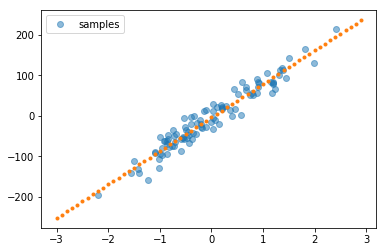

In [3]:
plt.plot(x,y, 'o', alpha=0.5,label = 'samples')
grid = np.arange(-3,3,0.1)
plt.plot(grid,best_fit(grid), '.')
plt.legend()

## Batch gradient descent -- classic gradient descent

Linear model: with $n$ features, $m$ training examples
$$h_\theta(x) = \sum_{i=0}^n \theta_j x_j,~x_0 = 1$$

Cost is $$J(\theta) =\frac{1}{2m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})^2$$

Algo is like: given a learning rate $\Delta$, update $\theta_i$ one by one without plug it back into $h$, until next iteration!
$$\Theta = \Theta - \frac{\Delta}{m}\sum_{i=1}^m (h_\theta(x^{(i)})-y^{(i)})(x^{(i)}) $$

$$\theta_j := \theta_j - \frac{\Delta}{m}\sum_{i=1}^m (h_\theta (x^{(i)})-y^{(i)}) x_j^{(i)}$$


In [4]:
def gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size 
    theta = theta_init
    history = [] 
    preds = []
    counter = 0
    oldcost = 0
    pred = np.dot(x, theta)
    error = pred - y 
    currentcost = np.sum(error ** 2) / (2 * m)
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        gradient = x.T.dot(error)/m 
        theta = theta - step * gradient  # update
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        costs.append(currentcost)
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [5]:
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]

In [6]:
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -3.73, 82.80 73
Least Squares: -3.71, 82.90


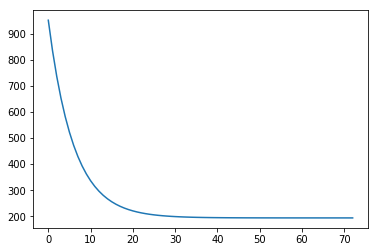

In [7]:
plt.plot(range(len(cost)), cost);

## Stochastic gradient descent - use one train example each time

Linear model: with $n$ features, $m$ training examples
$$h_\theta(x) = \sum_{i=0}^n \theta_j x_j,~x_0 = 1$$

Cost is 
$$J(\theta,(x^{(i)},y^{(i)})) =\frac{1}{2}(h_\theta(x^{(i)})-y^{(i)})^2$$


In [8]:
def sgd(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    m = y.size 
    oldtheta = 0
    theta = theta_init
    history = [] 
    preds = []
    grads=[]
    counter = 0
    oldcost = 0
    epoch = 0
    i = 0 #index
    pred = np.dot(x[i,:], theta)
    error = pred - y[i]
    gradient = x[i,:].T*error
    grads.append(gradient)
    print(gradient,x[i],y[i],pred, error, np.sum(error ** 2) / 2)
    currentcost = np.sum(error ** 2) / 2
    counter+=1
    preds.append(pred)
    costsum = currentcost
    costs.append(costsum/counter)
    history.append(theta)
    print("start",counter, costs, oldcost)
    while 1:
        gradient = x[i,:].T*error
        grads.append(gradient)
        oldtheta = theta
        theta = theta - step * gradient  
        history.append(theta)
        i += 1
        if i == m:
            epoch +=1
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            i = 0
        pred = np.dot(x[i,:], theta)
        error = pred - y[i]
        currentcost = np.sum(error ** 2) / 2
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        costsum += currentcost
        oldcost = costs[counter-2]
        costs.append(costsum/counter)
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, grads, counter, epoch

In [9]:
history2, cost2, preds2, grads2, iters2, epoch2 \
= sgd(xaug, y, theta_i, maxsteps=5000, step=0.01)


[-24.94172117  -0.80445599] [1.         0.03225343] 11.534851890155354 -13.406869280619063 -24.941721170774414 311.04472748032833
start 1 [311.04472748032833] 0


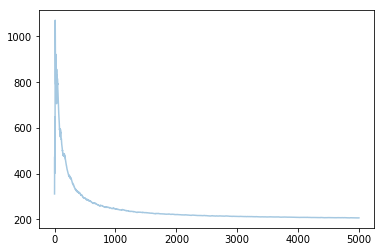

In [10]:
plt.plot(range(len(cost2[-10000:])), cost2[-10000:], alpha=0.4);


/Users/Sarah/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1004: UserWarning: The following kwargs were not used by contour: 'color'
  s)


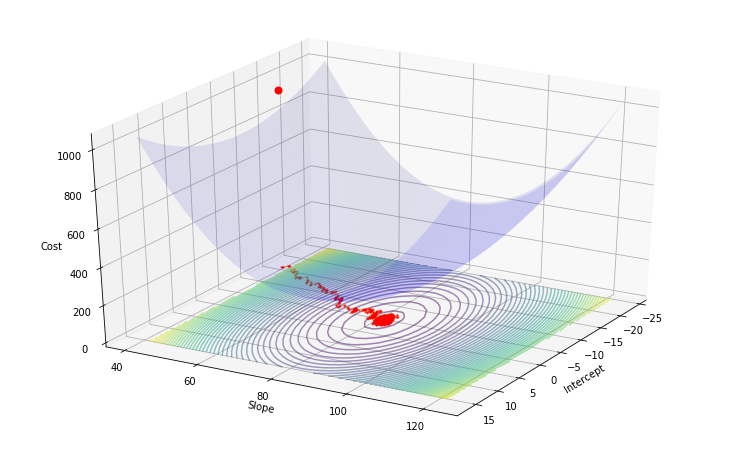

In [18]:
from mpl_toolkits.mplot3d import Axes3D

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(xaug, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)


fig = plt.figure(figsize=(10, 6))

ax = Axes3D(fig)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, \
                color='b', alpha=0.1,shade=True)

ax.contour(M, B, Z, 50, color='b', extend3d =False,\
           alpha=0.5, offset=0, stride=30)


ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Cost')
ax.view_init(elev=30., azim=30)
ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


ax.plot([t[0] for t in history2], [t[1] for t in history2], 0 , alpha=0.5, markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);


In [20]:
help(ax.view_init)

Help on method view_init in module mpl_toolkits.mplot3d.axes3d:

view_init(elev=None, azim=None) method of mpl_toolkits.mplot3d.axes3d.Axes3D instance
    Set the elevation and azimuth of the axes.
    
    This can be used to rotate the axes programmatically.
    
    'elev' stores the elevation angle in the z plane.
    'azim' stores the azimuth angle in the x,y plane.
    
    if elev or azim are None (default), then the initial value
    is used which was specified in the :class:`Axes3D` constructor.



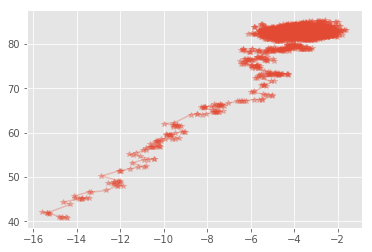

In [21]:
plt.style.use('ggplot')
plt.plot([t[0] for t in history2], \
         [t[1] for t in history2],'*-', alpha=0.3)
